In [1]:
import os
import statistics
import scipy as sp
import math
import pandas as pd
#pd.get_option("display.max_rows")
#pd.reset_option("display.max_rows")
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from statsmodels.regression.linear_model import OLS
from statsmodels.stats.outliers_influence import OLSInfluence
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator, RegressorMixin
%matplotlib inline

In [2]:
os.chdir(' ') #set proper directory depending where you put that project
#data - data for 2019/2020
#data05 - data for 2017/2018
#data1 - data for 2018/19
#data15 - data for 2020/21
data = pd.read_csv('danelic2019.csv',sep=';',engine='python')
data05 =  pd.read_csv('danelic2017.csv',sep=';',engine='python')
data1 = pd.read_csv('danelic2018.csv',sep=';',engine='python')
#data15 = pd.read_csv('danelic2020.csv',sep=';',engine='python')
data1=pd.DataFrame.append(data,data1)
data1=pd.DataFrame.append(data1,data05,ignore_index=True)
#data1=pd.DataFrame.append(data1,data15,ignore_index=True)
data1.sort_values('player')

,ď»żColumn1,player,nationality,position,squad,age,birth_year,value,height,position2,...,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season,Column1,Unnamed: 0
466,546.0,Aaron Connolly,ie IRL,FW,Brighton,19.0,2000.0,4000000.0,175.0,Forward - Centre-Forward,...,54.5,-13.3,-0.35,22369,0.0,0.0,0.0,201920#,NaN,NaN
7066,NaN,Aaron Cresswell,eng ENG,DF,West Ham,27.0,1989.0,12000000.0,170.0,Defender - Left-Back,...,57.8,-20.5,-0.54,56885,0.0,0.0,0.0,201718#,NaN,574.0
4691,NaN,Aaron Cresswell,eng ENG,DF,West Ham,28.0,1989.0,10000000.0,170.0,Defender - Left-Back,...,61.0,-11.9,-0.31,58336,0.0,0.0,0.0,201819#,542.0,NaN
2576,582.0,Aaron Cresswell,eng ENG,DF,West Ham,29.0,1989.0,6000000.0,170.0,Defender - Left-Back,...,61.1,-14.8,-0.39,44155,0.0,0.0,NaN,201920#,NaN,NaN
5688,NaN,Aaron Hunt,de GER,"MF,FW",Hamburger SV,30.0,1986.0,1500000.0,183.0,midfield - Attacking Midfield,...,52.7,-15.7,-0.46,50656,0.0,0.0,0.0,201718#,NaN,1120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [3]:
#adding dummy variables to dataset
data1 = pd.get_dummies(data1, columns=['league'])
data1 = data1.rename({"league_Bundesliga":"isBundesliga",
                                "league_La Liga":"isLaLiga",
                                "league_Premier League":"isPremierLeague",
                                "league_Ligue 1":"isLigue1",
                                "league_Serie A":"isSerieA"},axis='columns')
data1=pd.get_dummies(data1,columns=['Season'])
data1=pd.get_dummies(data1,columns=['foot'])
#deleting potential outliers that actually contribute nothing
data1=data1[data1['value']>1000000]
data1=data1[data1['games']>5]
data1=data1[data1['age']>0]
data1=data1[data1['height']>0]
data1

,ď»żColumn1,player,nationality,position,squad,age,birth_year,value,height,position2,...,isLaLiga,isLigue1,isPremierLeague,isSerieA,Season_201718#,Season_201819#,Season_201920#,foot_both,foot_left,foot_right
0,21.0,Martin Aguirregabiria,es ESP,DF,AlavÄ‚Â©s,23.0,1996.0,4000000.0,178.0,Defender - Right-Back,...,1,0,0,0,0,0,1,0,0,1
1,390.0,Oliver Burke,sco SCO,"MF,FW",AlavÄ‚Â©s,22.0,1997.0,4000000.0,188.0,Forward - Right Winger,...,1,0,0,0,0,0,1,0,0,1
2,430.0,VÄ‚Â­ctor Camarasa,es ESP,MF,AlavÄ‚Â©s,25.0,1994.0,4000000.0,183.0,Midfielder - Central Midfield,...,1,0,0,0,0,0,1,0,0,1
3,737.0,RubÄ‚Â©n Duarte,es ESP,DF,AlavÄ‚Â©s,23.0,1995.0,4000000.0,172.0,Defender - Left-Back,...,1,0,0,0,0,0,1,0,1,0
5,826.0,Ljubomir Fejsa,rs SRB,MF,AlavÄ‚Â©s,30.0,1988.0,2000000.0,183.0,Midfielder - Defensive Midfield,...,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7094,NaN,Mario GĂłmez,de GER,FW,Wolfsburg,32.0,1985.0,6000000.0,189.0,attack - Centre-Forward,...,0,0,0,0,1,0,0,0,0,1
7095,NaN,Josuha Guilavogui,fr FRA,MF,Wolfsburg,26.0,1990.0,7000000.0,188.0,midfield - Defensive Midfield,...,0,0,0,0,1,0,0,0,0,1
7102,NaN,Divock Origi,be BEL,FW,Wolfsburg,22.0,1995.0,10000000.0,185.0,attack - Centre-Forward,...,0,0,0,0,1,0,0,0,0,1
7104,NaN,Renato Steffen,ch SUI,"FW,MF",Wolfsburg,25.0,1991.0,3500000.0,170.0,attack - Right Winger,...,0,0,0,0,1,0,0,0,1,0


In [4]:
#FORWARDS
dataFWD = data1[data1['position2'].str[:7]=='Forward']
dataFWD2 = data1[data1['position2'].str[:6]=='attack']
dataFWD=pd.DataFrame.append(dataFWD,dataFWD2)
dataFWD

,ď»żColumn1,player,nationality,position,squad,age,birth_year,value,height,position2,...,isLaLiga,isLigue1,isPremierLeague,isSerieA,Season_201718#,Season_201819#,Season_201920#,foot_both,foot_left,foot_right
1,390.0,Oliver Burke,sco SCO,"MF,FW",AlavÄ‚Â©s,22.0,1997.0,4000000.0,188.0,Forward - Right Winger,...,1,0,0,0,0,0,1,0,0,1
8,1212.0,Joselu,es ESP,FW,AlavÄ‚Â©s,29.0,1990.0,5000000.0,191.0,Forward - Centre-Forward,...,1,0,0,0,0,0,1,0,0,1
16,1631.0,Ä‚â€°dgar MÄ‚Â©ndez,es ESP,"MF,FW",AlavÄ‚Â©s,29.0,1990.0,1600000.0,187.0,Forward - Right Winger,...,1,0,0,0,0,0,1,0,0,1
19,1950.0,Lucas PÄ‚Â©rez,es ESP,FW,AlavÄ‚Â©s,30.0,1988.0,12000000.0,180.0,Forward - Centre-Forward,...,1,0,0,0,0,0,1,0,1,0
22,2109.0,Luis Rioja,es ESP,MF,AlavÄ‚Â©s,25.0,1993.0,2000000.0,176.0,Forward - Left Winger,...,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7092,NaN,Landry Dimata,be BEL,"FW,MF",Wolfsburg,19.0,1997.0,6000000.0,185.0,attack - Centre-Forward,...,0,0,0,0,1,0,0,0,0,1
7094,NaN,Mario GĂłmez,de GER,FW,Wolfsburg,32.0,1985.0,6000000.0,189.0,attack - Centre-Forward,...,0,0,0,0,1,0,0,0,0,1
7102,NaN,Divock Origi,be BEL,FW,Wolfsburg,22.0,1995.0,10000000.0,185.0,attack - Centre-Forward,...,0,0,0,0,1,0,0,0,0,1
7104,NaN,Renato Steffen,ch SUI,"FW,MF",Wolfsburg,25.0,1991.0,3500000.0,170.0,attack - Right Winger,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
#was originally used for correlations calculations (visible in appendix)

#dataFWD['age']=dataFWD['age']*dataFWD['age']
#dataFWD_cor = dataFWD.corr()
#show=pd.Series(dataFWD_cor['value'])
#pd.set_option('display.max_rows', None)
#show.sort_values(ascending=False)

In [6]:
#for my liking
def ln(x):
    return np.log(x)

#Creating a linear regression
trainFWD, testFWD = train_test_split(dataFWD, train_size=0.8)
modelFWD1=smf.ols('ln(value)~wins_gk+clean_sheets+Pts+W+GDiff+clean_sheets_pct+CL+xGDiff+GF+xG+passes_ground+passes_completed_medium+passes_medium+games+games_starts+minutes_90s+minutes+games_gk+games_starts_gk+minutes_90s_gk+minutes_gk+passes_throws_gk+passes_other_body+passes_completed+passes_received+passes_live+pass_targets+carries+touches_live_ball+passes_pct_long+touches_def_pen_area+passes_completed_short+passes_gk+passes_pressure+passes_pct+def_actions_outside_pen_area_gk+passes_total_distance+psxg_net_gk+touches_def_3rd+passes_short+passes+touches+ball_recoveries+through_balls+dribble_tackles_pct+psxg_net_per90_gk+passes_pct_launched_gk+save_pct+passes_low+xa_net+passes_progressive_distance+WinCL+carry_distance+gca_passes_dead+errors+passes_switches+passes_completed_long+crosses_gk+passes_intercepted+crosses_stopped_gk+dribbles_completed_pct+passes_left_foot+carry_progressive_distance+isPremierLeague+MP+avg_distance_def_actions_gk+saves+draws_gk+assists+goal_kicks+gca+foot_left+isLaLiga+passes_right_foot+shots_on_target_against+passes_pct_short+aerials_won_pct+passes_dead+assists_per90+gca_per90+passes_completed_launched_gk+passes_long+sca_passes_dead+def_actions_outside_pen_area_per90_gk+passes_pct_medium+crosses_stopped_pct_gk+passes_oob+own_goals_against_gk+gca_passes_live+pens_conceded+shots_on_target_pct+throw_ins+psxg_gk+pens_missed_gk+goals_assists_pens_per90+passes_received_pct+height+pens_allowed+goals_assists_per90+passes_launched_gk+npxg_net+pens_att_gk+cards_red+sca+xg_net+sca_passes_live+passes_high+fouled+free_kick_goals_against_gk+cards_yellow+corner_kicks_in+xa+passes_offsides+pens_saved+dribbles_completed+dribble_tackles+assisted_shots+players_dribbled_past+npxg_per_shot+xa_per90+passes_into_penalty_area+pressure_regain_pct+tackles_def_3rd+passes_free_kicks+miscontrols+dribbles+dribbles_vs+passes_head+isSerieA+clearances+corner_kick_goals_against_gk+dribbled_past+corner_kicks+shots_on_target_per90+tackles+goals_against_gk+pressures_def_3rd+tackles_won+dispossessed+tackles_mid_3rd+fouls+shots_total_per90+progressive_passes+offsides+npxg_xa_per90+xg_xa_per90+goals_pens_per90+passes_blocked+touches_mid_3rd+aerials_won+shots_on_target+sca_dribbles+gca_shots+pens_att+pens_made+pens_won+nutmegs+goals_per90+crosses+pressures+blocked_shots+pressure_regains+interceptions+goals_per_shot+shots_total+pressures_mid_3rd+shots_free_kicks+touches_att_pen_area+goals+sca_fouled+pressures_att_3rd+aerials_lost+touches_att_3rd+tackles_att_3rd+xg+goals_per_shot_on_target+own_goals+npxg+sca_shots+npxg_per90+xg_per90+blocks+blocked_passes+sca_per90+crosses_into_penalty_area+passes_into_final_third+D+psnpxg_per_shot_on_target_against+goal_kick_length_avg+foot_right+isBundesliga+isLigue1+passes_length_avg_gk+pct_goal_kicks_launched+losses_gk+pct_passes_launched_gk+age+goals_against_per90_gk+xGA+GA+L+LgRk+gca_dribbles+gca_fouled+gca_og_for+corner_kicks_out+corner_kicks_straight+foot_both+cards_yellow_red+blocked_shots_saves',data=dataFWD)    

modelFWD=smf.ols('ln(value)~age+CL+goals+gca'
                   '+Pts+xG+xGA+dribbles_completed'
                   ''
                   '+xg_xa_per90+touches_att_pen_area+'
                   '+passes_into_final_third+'
                   '+isPremierLeague+isLigue1',data=dataFWD)
#modelFWD=smf.ols('ln(value)~Pts+touches_att_pen_area',data=dataFWD)
resultsFWD=modelFWD.fit()
resultsFWD_params=resultsFWD.params
resultsFWD1=modelFWD1.fit()
resultsFWD1_params=resultsFWD1.params
#Creating a robust regression
modelFWDrobust=sm.RLM(modelFWD.endog,modelFWD.exog,data=trainFWD).fit()
#r2_wls = sm.WLS(modelGK.endog, modelGK.exog, weights=modelGKrobust.weights).fit().rsquared
#modelGKrobustridge = sm.WLS(modelGK.endog, modelGK.exog, weights=modelGKrobust.weights).fit_regularized(alpha=0.2, L1_wt=0,start_params=resultsGK_params)
#print(modelGKrobust.summary(),
      #"R^2:", r2_wls)
finalFWD1 = sm.regression.linear_model.OLSResults(modelFWD, 
                                              modelFWDrobust.params, 
                                              modelFWD.normalized_cov_params)
finalFWD1.summary()

#assists #gca
#print('do not bother about it printing summary like for OLS - this is a robust regression as you can see from the code')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              ln(value)   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     256.8
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        15:45:31   Log-Likelihood:                -1401.7
No. Observations:                1493   AIC:                             2831.
Df Residuals:                    1479   BIC:                             2906.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  16.8190      0.193     86.933      0.000      16.439      17.198
age                        -0.0816      0.005    -17.477      0.000      -0.091      -0.072
CL                          0.2616      0.062      4.197      0.000       0.139       0.384
goals                       0.0391      0.006      6.828      0.000       0.028       0.050
gca                         0.0136      0.006      2.426      0.015       0.003       0.025
Pts                         0.0099      0.002      4.732      0.000       0.006       0.014
xG                          0.0080      0.003      3.094      0.002       0.003       0.013
xGA                        -0.0150      0.002     -6.737      0.000      -0.019      -0.011
dribbles_completed          0.0030      0.001      2.765      0.006       0.001       0.005
xg_xa_per90                 0.3355      0.113      2.972      0.003       0.114       0.557
touches_att_pen_area        0.0029      0.001      5.027      0.000       0.002       0.004
passes_into_final_third     0.0055      0.001      5.285      0.000       0.003       0.008
isPremierLeague             0.5938      0.040     14.856      0.000       0.515       0.672
isLigue1                   -0.3772      0.046     -8.119      0.000      -0.468      -0.286
==============================================================================
Omnibus:                        8.012   Durbin-Watson:                   1.525
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                7.942
Skew:                           0.170   Prob(JB):                       0.0189
Kurtosis:                       3.111   Cond. No.                     1.61e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif = pd.DataFrame()
vif["features"] = modelFWD.exog_names
vif["VIF Factor"] = [variance_inflation_factor(finalFWD1.model.exog, i) for i in range(finalFWD1.model.exog.shape[1])]
vif

,features,VIF Factor
0,Intercept,144.604237
1,age,1.150069
2,CL,2.373250
3,goals,3.885471
4,gca,4.028451
5,Pts,4.940157
6,xG,4.099917
7,xGA,1.988811
8,dribbles_completed,2.578694
9,xg_xa_per90,2.120385


In [10]:
#testing
#Breusch-Pagan
bptestFWD=sm.stats.diagnostic.het_breuschpagan(finalFWD1.resid, finalFWD1.model.exog)
bptestFWD

(41.52349976241571,
 7.833097243005176e-05,
 3.2546835074788447,
 6.873260392961859e-05)

In [12]:
#Chowtest
trainFWD1=dataFWD[dataFWD['Season_201819#']==0]
trainFWD2=dataFWD[dataFWD['Season_201819#']==1]
JFWD = len(resultsFWD.params)-1 #number of coefficients
N1FWD = trainFWD1.shape[0]
N2FWD = trainFWD2.shape[0]
RSSdFWD=resultsFWD.ssr
resultsFWDridge1=smf.ols('ln(value)~age+CL+goals+gca'
                   '+Pts+xG+xGA+dribbles_completed'
                   ''
                   '+xg_xa_per90+touches_att_pen_area+'
                   '+passes_into_final_third+'
                   '+isPremierLeague+isLigue1',data=trainFWD1).fit()
RSSbFWD=resultsFWDridge1.ssr
kFWD = len(resultsFWDridge1.params)-1
resultsFWDridge2=smf.ols('ln(value)~age+CL+goals+gca'
                   '+Pts+xG+xGA+dribbles_completed'
                   ''
                   '+xg_xa_per90+touches_att_pen_area+'
                   '+passes_into_final_third+'
                   '+isPremierLeague+isLigue1',data=trainFWD2).fit()
RSSnbFWD = resultsFWDridge2.ssr
ChowFWD=((RSSdFWD-(RSSbFWD+RSSnbFWD))/JFWD)/((RSSbFWD+RSSnbFWD)/(N1FWD+N2FWD-2*kFWD))
pFWD=sp.stats.f.cdf(ChowFWD, JFWD, N1FWD+N2FWD-2*kFWD)
print(ChowFWD,pFWD,JFWD)

1.415270559130518 0.8554126558882577 13


In [17]:
#cross validation
class SMWrapper(BaseEstimator, RegressorMixin):
    """ A universal sklearn-style wrapper for statsmodels regressors """
    def __init__(self, model_class, fit_intercept=True):
        self.model_class = model_class
        self.fit_intercept = fit_intercept
    def fit(self, X, y):
        if self.fit_intercept:
            X = sm.add_constant(X)
        self.model_ = self.model_class(y, X)
        self.results_ = self.model_.fit()
        #self.results_ = self.model_.fit_regularized(L1_wt=1, alpha=0.1,start_params=resultsFWD_params)
    def predict(self, X):
        if self.fit_intercept:
            X = sm.add_constant(X)
        return self.results_.predict(X)
    
linearcval=cross_val_score(SMWrapper(sm.RLM), modelFWD.exog, modelFWD.endog, scoring='neg_root_mean_squared_error')
pd.DataFrame(pd.Series(np.transpose(linearcval)))
#robustcval=cross_val_score(SMWrapper(sm.RLM), modelFWD.exog, modelFWD.endog, scoring='neg_root_mean_squared_error')
#pd.DataFrame(pd.concat([pd.Series(np.transpose(linearcval)),pd.Series(np.transpose(robustcval))],axis=1))

,0
0,-0.644672
1,-0.656716
2,-0.613893
3,-0.629753
4,-0.603932


In [20]:
data=dataFWD[dataFWD['Season_201920#']==1]
#data1=data.sort_values('clean_sheetsm',ascending=False)[0:10]['value']
#data2=data.sort_values('psnpxg_per_shot_on_target_against',ascending=True)[0:10]['value']
#data3=data.sort_values('passes_pct_launched_gk',ascending=False)[0:10]['value']
data=data[['player','value','goals','xg_xa_per90','passes_into_final_third','touches_att_pen_area','gca','dribbles_completed']]
data1=data.sort_values('value',ascending=False)[0:10]
#p.DataFrame(data.mean()).transpose()
data1

,player,value,goals,xg_xa_per90,passes_into_final_third,touches_att_pen_area,gca,dribbles_completed
1858,Kylian MbappÄ‚Â©,180000000.0,18.0,1.52,23.0,208.0,12.0,59.0
1430,Raheem Sterling,128000000.0,20.0,0.82,31.0,296.0,11.0,59.0
1862,Neymar,128000000.0,13.0,1.27,110.0,109.0,17.0,86.0
1328,Mohamed Salah,120000000.0,19.0,0.84,41.0,317.0,16.0,66.0
1321,Sadio ManÄ‚Â©,120000000.0,18.0,0.69,65.0,219.0,16.0,76.0
2341,Harry Kane,120000000.0,18.0,0.45,48.0,132.0,6.0,28.0
695,Jadon Sancho,117000000.0,17.0,0.72,70.0,144.0,32.0,93.0
257,Lionel Messi,112000000.0,25.0,1.08,208.0,217.0,36.0,183.0
253,Antoine Griezmann,96000000.0,9.0,0.42,51.0,161.0,10.0,18.0
196,JoÄ‚Ĺ�o FÄ‚Â©lix,81000000.0,6.0,0.51,41.0,85.0,4.0,20.0


Text(0.85, 0.85, '0.45')

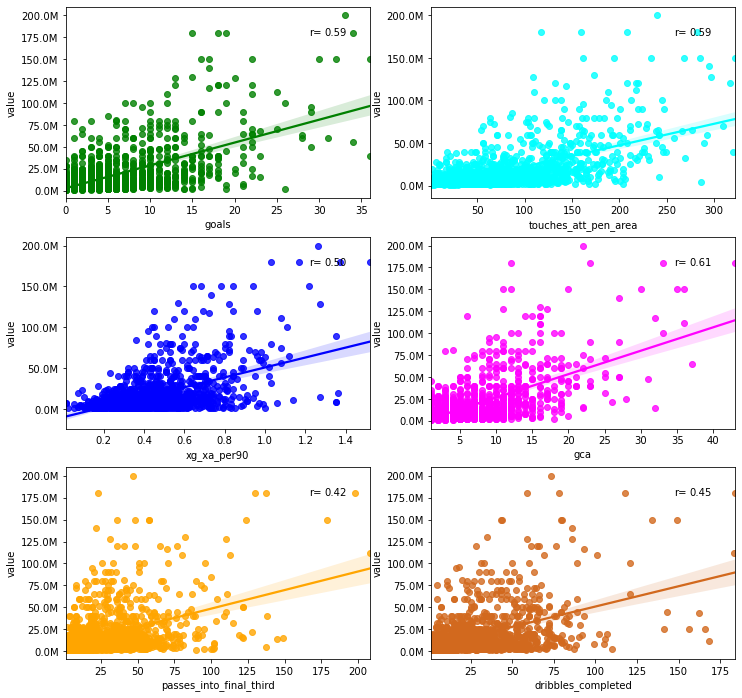

In [21]:
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)
formatter = mpl.ticker.FuncFormatter(millions)


#dataFWD=dataFWD[['goals','xg_xa_per90','passes_into_final_third','touches_att_pen_area','gca','dribbles_completed']

#dataFWD=dataFWD[dataFWD['goals']>0]
dataFWD=dataFWD[dataFWD['xg_xa_per90']>0]
dataFWD=dataFWD[dataFWD['passes_into_final_third']>0]
dataFWD=dataFWD[dataFWD['touches_att_pen_area']>0]
dataFWD=dataFWD[dataFWD['gca']>0]
dataFWD=dataFWD[dataFWD['dribbles_completed']>0]
corrcoef1=np.corrcoef(dataFWD['value'],dataFWD['goals'])
corrcoef2=np.corrcoef(dataFWD['value'],dataFWD['xg_xa_per90'])
corrcoef3=np.corrcoef(dataFWD['value'],dataFWD['passes_into_final_third'])
corrcoef4=np.corrcoef(dataFWD['value'],dataFWD['touches_att_pen_area'])
corrcoef5=np.corrcoef(dataFWD['value'],dataFWD['gca'])
corrcoef6=np.corrcoef(dataFWD['value'],dataFWD['dribbles_completed'])
corrcoef1=corrcoef1[0,1]
corrcoef2=corrcoef2[0,1]
corrcoef3=corrcoef3[0,1]
corrcoef4=corrcoef4[0,1]
corrcoef5=corrcoef5[0,1]
corrcoef6=corrcoef6[0,1]

fig, ax = plt.subplots(3, 2, figsize=(12, 12))
sns.regplot(ax=ax[0,0],x=dataFWD['goals'],y=dataFWD['value'],data=dataFWD,color='g')
sns.regplot(ax=ax[1,0],x=dataFWD['xg_xa_per90'],y=dataFWD['value'],data=dataFWD,color='blue')
sns.regplot(ax=ax[2,0],x=dataFWD['passes_into_final_third'],y=dataFWD['value'],data=dataFWD,color='orange')
sns.regplot(ax=ax[0,1],x=dataFWD['touches_att_pen_area'],y=dataFWD['value'],data=dataFWD,color='cyan')
sns.regplot(ax=ax[1,1],x=dataFWD['gca'],y=dataFWD['value'],data=dataFWD,color='magenta')
sns.regplot(ax=ax[2,1],x=dataFWD['dribbles_completed'],y=dataFWD['value'],data=dataFWD,color='chocolate')

ax[0,0].yaxis.set_major_formatter(formatter)
ax[0,0].annotate("r=",xy=(0.8,0.85), xycoords="axes fraction")
ax[0,0].annotate("{:.2f}".format(corrcoef1),xy=(0.85,0.85), xycoords="axes fraction")

ax[1,0].yaxis.set_major_formatter(formatter)
ax[1,0].annotate("r=",xy=(0.8,0.85), xycoords="axes fraction")
ax[1,0].annotate("{:.2f}".format(corrcoef2),xy=(0.85,0.85), xycoords="axes fraction")

ax[2,0].yaxis.set_major_formatter(formatter)
ax[2,0].annotate("r=",xy=(0.8,0.85), xycoords="axes fraction")
ax[2,0].annotate("{:.2f}".format(corrcoef3),xy=(0.85,0.85), xycoords="axes fraction")

ax[0,1].yaxis.set_major_formatter(formatter)
ax[0,1].annotate("r=",xy=(0.8,0.85), xycoords="axes fraction")
ax[0,1].annotate("{:.2f}".format(corrcoef4),xy=(0.85,0.85), xycoords="axes fraction")

ax[1,1].yaxis.set_major_formatter(formatter)
ax[1,1].annotate("r=",xy=(0.8,0.85), xycoords="axes fraction")
ax[1,1].annotate("{:.2f}".format(corrcoef5),xy=(0.85,0.85), xycoords="axes fraction")

ax[2,1].yaxis.set_major_formatter(formatter)
ax[2,1].annotate("r=",xy=(0.8,0.85), xycoords="axes fraction")
ax[2,1].annotate("{:.2f}".format(corrcoef6),xy=(0.85,0.85), xycoords="axes fraction")